In [873]:
import requests
import pandas as pd
import numpy as np


### tweets

In [874]:
bearer_token='AAAAAAAAAAAAAAAAAAAAAC%2BhhwEAAAAA7bXZwcuS7wwBoh9LJvN6lPwCj%2Fw%3DXxF6dxdiObauSaKJSWHU6r2iExJFkuxszZai2htQFiadCArvzs'
headers = {'Authorization': 'Bearer ' + bearer_token};

params = {  
    'max_results':'100',
    'start_time':'2022-06-29T00:00:00.000Z',
    'end_time':'2022-10-06T00:00:00.000Z',
    'tweet.fields': 'author_id,created_at,id,public_metrics,source,text',
    'expansions': 'author_id',
    'user.fields': 'name,username'
}

url = 'https://api.twitter.com/2/users/1162694149956603904/mentions'

res = requests.get(url,params=params, headers=headers)
res.json()

{'data': [{'author_id': '1003872445',
   'created_at': '2022-10-04T16:27:23.000Z',
   'text': 'Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀',
   'edit_history_tweet_ids': ['1577334577701453827'],
   'id': '1577334577701453827',
   'public_metrics': {'retweet_count': 2,
    'reply_count': 0,
    'like_count': 12,
    'quote_count': 0},
   'source': 'Twitter Web App'},
  {'author_id': '2529499620',
   'created_at': '2022-10-03T11:52:25.000Z',
   'text': 'El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈\n\nDescubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻\n\nToda la información aquí! 👇\nhttps://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX',
   'edit_history_tweet_ids': ['1576902991507922944'],
   'id': '15

In [875]:
respuesta_json1=res.json()

In [876]:
#respuesta_json1.keys()

In [877]:
#respuesta_json.get('data')

In [878]:
#respuesta_json1.get('includes')

In [879]:
def json_to_datafram_tweets(data_entrada):
    
    elements = data_entrada['data']
    #elementss=data_entrada['includes']['users']

    places = {'retweet_count': [], 'reply_count': [], 'like_count': [],'quote_count': [],
    'fecha': [],'author_id': [],'id': [],'text': []} #,'name': [],'username': []}

    for i in elements:
        retweet_count = i['public_metrics']['retweet_count']
        reply_count = i['public_metrics']['reply_count']
        like_count = i['public_metrics']['like_count']
        quote_count = i['public_metrics']['quote_count']
        fecha = i['created_at']
        author_id = i['author_id']
        id = i['id']
        text = i['text']
        #user = ''
        #for x in elementss:
            #if i['author_id'] == x['id']:
                #user = x
                #break
        #name=user['name']
        #username=user['username']

        
        places['retweet_count'].append(retweet_count)
        places['reply_count'].append(reply_count)
        places['like_count'].append(like_count)
        places['quote_count'].append(quote_count)
        places['fecha'].append(fecha)
        places['author_id'].append(author_id)
        places['id'].append(id)
        places['text'].append(text)
        #places['name'].append(name)
        #places['username'].append(username)
        

    df = pd.DataFrame(places)
    return df

In [880]:
df_return1=json_to_datafram_tweets(respuesta_json1)
df_return1

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
0,2,0,12,0,2022-10-04T16:27:23.000Z,1003872445,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech..."
1,3,0,3,0,2022-10-03T11:52:25.000Z,2529499620,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈\n\nDescubre n...
2,0,0,1,0,2022-10-03T08:48:29.000Z,706520411551494145,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!
3,3,0,4,0,2022-09-28T20:14:18.000Z,604485175,1575217357105946624,Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp real...
4,1,1,2,0,2022-09-27T19:51:59.000Z,1391838162830385165,1574849353172373504,"¿Eres o quieres ser talento IT y estás en España? 🇪🇸 Si la respuesta es sí, te contamos que tene..."
...,...,...,...,...,...,...,...,...
73,0,1,3,0,2022-06-29T19:10:52.000Z,40046861,1542224097089822726,@HeavyMental_es @UbaldoHervas @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech El ...
74,0,0,0,0,2022-06-29T18:09:38.000Z,1437833350732034050,1542208686881390592,No todo va a ser trabajar!! Equipo UCuber #TheBridge @TheBridge_Tech #FullStack #javascript30 h...
75,3,2,22,3,2022-06-29T18:00:06.000Z,1255794072280842240,1542206287915585536,El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/...
76,2,1,8,1,2022-06-29T14:22:55.000Z,3319318173,1542151630128381953,"We had a great time yesterday at #TechTalks, talking to all the motivated and ambitious students..."


In [881]:
bearer_token='AAAAAAAAAAAAAAAAAAAAAC%2BhhwEAAAAA7bXZwcuS7wwBoh9LJvN6lPwCj%2Fw%3DXxF6dxdiObauSaKJSWHU6r2iExJFkuxszZai2htQFiadCArvzs'
headers = {'Authorization': 'Bearer ' + bearer_token};

params = {  
    'max_results':'100',
    'start_time':'2022-06-13T00:00:00.000Z',
    'end_time':'2022-06-29T00:00:00.000Z',
    'tweet.fields': 'author_id,created_at,id,public_metrics,source,text',
    'expansions': 'author_id',
    'user.fields': 'name,username'
}

url = 'https://api.twitter.com/2/users/1162694149956603904/mentions'

res = requests.get(url,params=params, headers=headers)
res.json()

{'data': [{'text': '@fernandojsg @HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Y queremos.',
   'id': '1541859665570664448',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 3,
    'quote_count': 0},
   'author_id': '1434890317640126469',
   'created_at': '2022-06-28T19:02:45.000Z',
   'edit_history_tweet_ids': ['1541859665570664448'],
   'source': 'Twitter for Android'},
  {'text': '@HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Mens sana in corpore sano https://t.co/PJJ7Eg0KPQ',
   'id': '1541850071456792578',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 8,
    'quote_count': 1},
   'author_id': '144581964',
   'created_at': '2022-06-28T18:24:37.000Z',
   'edit_history_tweet_ids': ['1541850071456792578'],
   'source': 'Twitter Web App'},
  {'text': '@GuillermoDeHaro @Mulder01198676 @HeavyMental_es @DavidAlayon @Recuenco @_miki @TheBridge_Tech Jajajaja

In [882]:
respuesta_json2=res.json()

In [883]:
df_return2=json_to_datafram_tweets(respuesta_json2)
df_return2

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
0,0,0,3,0,2022-06-28T19:02:45.000Z,1434890317640126469,1541859665570664448,@fernandojsg @HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Y qu...
1,0,0,8,1,2022-06-28T18:24:37.000Z,144581964,1541850071456792578,@HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Mens sana in corp...
2,0,0,3,0,2022-06-28T17:07:39.000Z,427660452,1541830701863034880,@GuillermoDeHaro @Mulder01198676 @HeavyMental_es @DavidAlayon @Recuenco @_miki @TheBridge_Tech J...
3,0,0,3,0,2022-06-28T16:50:57.000Z,317352917,1541826498650406913,@HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Yo no pude ir...😭...
4,0,0,2,0,2022-06-28T16:14:57.000Z,276656109,1541817440207884288,"@didacjo1 @_miki @samuelgil He de decir que luego pusieron cervezas, pero porque se estiraron lo..."
...,...,...,...,...,...,...,...,...
70,0,0,1,0,2022-06-13T11:42:21.000Z,18955785,1536313018321190912,Lo conseguí!!! Gracias @TheBridge_Tech @HeavyMental_es https://t.co/SOccLkT3dG
71,0,0,1,0,2022-06-13T11:38:00.000Z,15521945,1536311923423203331,@TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo! Que buena forma de empezar la semana.
72,0,0,2,0,2022-06-13T11:34:19.000Z,10614452,1536310998319210496,@TheBridge_Tech @HeavyMental_es @Alienta ¡La tengo!
73,2,4,6,0,2022-06-13T11:33:09.000Z,1255794072280842240,1536310702876549123,Lo prometimos y han llegado gracias a @TheBridge_Tech ... últimas entradas para el podcast 27 en...


In [884]:
df_tweets=pd.concat([df_return1,df_return2], join='inner')
df_tweets

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
0,2,0,12,0,2022-10-04T16:27:23.000Z,1003872445,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech..."
1,3,0,3,0,2022-10-03T11:52:25.000Z,2529499620,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈\n\nDescubre n...
2,0,0,1,0,2022-10-03T08:48:29.000Z,706520411551494145,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!
3,3,0,4,0,2022-09-28T20:14:18.000Z,604485175,1575217357105946624,Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp real...
4,1,1,2,0,2022-09-27T19:51:59.000Z,1391838162830385165,1574849353172373504,"¿Eres o quieres ser talento IT y estás en España? 🇪🇸 Si la respuesta es sí, te contamos que tene..."
...,...,...,...,...,...,...,...,...
70,0,0,1,0,2022-06-13T11:42:21.000Z,18955785,1536313018321190912,Lo conseguí!!! Gracias @TheBridge_Tech @HeavyMental_es https://t.co/SOccLkT3dG
71,0,0,1,0,2022-06-13T11:38:00.000Z,15521945,1536311923423203331,@TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo! Que buena forma de empezar la semana.
72,0,0,2,0,2022-06-13T11:34:19.000Z,10614452,1536310998319210496,@TheBridge_Tech @HeavyMental_es @Alienta ¡La tengo!
73,2,4,6,0,2022-06-13T11:33:09.000Z,1255794072280842240,1536310702876549123,Lo prometimos y han llegado gracias a @TheBridge_Tech ... últimas entradas para el podcast 27 en...


In [885]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 74
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   retweet_count  153 non-null    int64 
 1   reply_count    153 non-null    int64 
 2   like_count     153 non-null    int64 
 3   quote_count    153 non-null    int64 
 4   fecha          153 non-null    object
 5   author_id      153 non-null    object
 6   id             153 non-null    object
 7   text           153 non-null    object
dtypes: int64(4), object(4)
memory usage: 10.8+ KB


In [886]:
df_tweets['id'].value_counts()

1577334577701453827    1
1541558488001822725    1
1541690507600056320    1
1541682809370300417    1
1541681065802309632    1
                      ..
1547230643561664515    1
1547209900874506241    1
1546817334882476032    1
1546397466517540866    1
1536267654717132801    1
Name: id, Length: 153, dtype: int64

### usuarios 

In [887]:
def json_to_datafram_ususarios(data_entrada):
    
    places = {'name': [],'username': [],'id': []}
    elements = data_entrada['includes']['users']

    for i in elements:

        id = i['id']
        name = i['name']
        username = i['username']
        
        places['id'].append(id)
        places['name'].append(name)
        places['username'].append(username)

    df = pd.DataFrame(places)

    return df

In [888]:
df_return3=json_to_datafram_ususarios(respuesta_json1)
df_return3

,name,username,id
0,Pau Mugarra,PauMugarra,1003872445
1,Formación Fundación Universidad Carlos III,formacion_fuc3,2529499620
2,JoseSola,Jose_Sola_,706520411551494145
3,Berta Otero,bertinha84,604485175
4,Apiux Tecnología,Apiuxtecnologia,1391838162830385165
5,PyData Madrid,PyDataMadrid,1494355208473874438
6,diegodl,diegodl,12085582
7,graphext,graphext,2907682397
8,Biohub VLC,BiohubVLC,1131933723681800193
9,COITCV/AVIT,COITCV,1073622740


In [889]:
df_return4=json_to_datafram_ususarios(respuesta_json2)
df_return4

,name,username,id
0,Sergio Berbis,Sergio_Berbis,1434890317640126469
1,Fernando Serrano 🇺🇦,fernandojsg,144581964
2,Antonio Muñiz,Antonio_Muniz_C,427660452
3,Mayte Tortosa Laso,mtortosal,317352917
4,Jorge Ordovás,joobid,276656109
5,Valientes Emprendedores,valientesempren,271028835
6,didacjo,didacjo1,1482505294232043523
7,Mónica Quintana,moquintana,803255406
8,Mulder,Mulder01198676,1493264171705765890
9,Daniel Granados,DanielDanigran,779234238977675264


In [890]:
df_ususarios=pd.concat([df_return3,df_return4], join='inner')
df_ususarios

,name,username,id
0,Pau Mugarra,PauMugarra,1003872445
1,Formación Fundación Universidad Carlos III,formacion_fuc3,2529499620
2,JoseSola,Jose_Sola_,706520411551494145
3,Berta Otero,bertinha84,604485175
4,Apiux Tecnología,Apiuxtecnologia,1391838162830385165
...,...,...,...
31,Pelayo Arbués,pelayoarbues,55193695
32,Jairo P,PesetJairo,962578275162869760
33,Javi Pérez ⚡ 😎 Learning by doing. 🦾 💻 📚 🚀,JaviMostoles,18955785
34,Bill Murphy,wmurphy,15521945


In [891]:
df_ususarios['id'].value_counts()

1003872445             2
874916978665938945     2
1255794072280842240    2
12085582               2
1162694149956603904    2
                      ..
462004230              1
45599578               1
92249250               1
763323065199628288     1
10614452               1
Name: id, Length: 81, dtype: int64

In [892]:
df_ususarios=df_ususarios.drop_duplicates()

### base de SQL

In [507]:
import pandas as pd
import sqlite3

In [508]:
# Conectamos con la base de datos databade_twitter.db
connection = sqlite3.connect("database_twitter.db")
# Obtenemos un cursor que utilizaremos para hacer las queries
cursor = connection.cursor()

In [512]:
create_table = '''
CREATE TABLE tweets (
    id VARCHAR ,
    retweet_count INT,
    reply_count INT,
    like_count INT,
    quote_count INT,
    fecha VARCHAR,
    author_id VARCHAR,
    text VARCHAR,
    PRIMARY KEY (id)
    FOREIGN KEY (author_id) REFERENCES user(id)


)
'''
cursor.execute(create_table)

In [514]:
create_table = '''
CREATE TABLE ususarios (
    id VARCHAR,
    name VARCHAR,
    username VARCHAR,
    PRIMARY KEY (id)  
)
'''
cursor.execute(create_table)

In [519]:
# drop_table = '''DROP TABLE tweets'''
# cursor.execute(drop_table)

In [513]:
df_tweets.to_sql("tweets",connection,if_exists="append",index=False)

In [518]:
df_ususarios.to_sql("ususarios",connection,if_exists="append",index=False)

In [520]:
sql = '''SELECT * FROM tweets'''
cursor.execute(sql)
mi_tabla_tweets = cursor.fetchall()
mi_tabla_tweets

[('1577334577701453827',
  2,
  0,
  12,
  0,
  '2022-10-04T16:27:23.000Z',
  '1003872445',
  'Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀'),
 ('1576902991507922944',
  3,
  0,
  3,
  0,
  '2022-10-03T11:52:25.000Z',
  '2529499620',
  'El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈\n\nDescubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻\n\nToda la información aquí! 👇\nhttps://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX'),
 ('1576856703349374976',
  0,
  0,
  1,
  0,
  '2022-10-03T08:48:29.000Z',
  '706520411551494145',
  '@jorgegrev @TheBridge_Tech Enhorabuena crack!'),
 ('1575217357105946624',
  3,
  0,
  4,
  0,
  '2022-09-28T20:14:18.000Z',
  '604485175',
  'Hoy por fin ve la luz mi primer Case Stud

In [521]:
sql = '''SELECT * FROM ususarios'''
cursor.execute(sql)
mi_tabla_ususarios = cursor.fetchall()
mi_tabla_ususarios

[('1003872445', 'Pau Mugarra', 'PauMugarra'),
 ('2529499620',
  'Formación Fundación Universidad Carlos III',
  'formacion_fuc3'),
 ('706520411551494145', 'JoseSola', 'Jose_Sola_'),
 ('604485175', 'Berta Otero', 'bertinha84'),
 ('1391838162830385165', 'Apiux Tecnología', 'Apiuxtecnologia'),
 ('1494355208473874438', 'PyData Madrid', 'PyDataMadrid'),
 ('12085582', 'diegodl', 'diegodl'),
 ('2907682397', 'graphext', 'graphext'),
 ('1131933723681800193', 'Biohub VLC', 'BiohubVLC'),
 ('1073622740', 'COITCV/AVIT', 'COITCV'),
 ('41110484', 'Raúl Cotrina', 'raulcotrina'),
 ('210026854', 'Ana Amar🎃', 'AnaWhitewolf'),
 ('2390191837', 'LaSeñoenlaRadioTdF', 'LaSenioenRadio'),
 ('394734366', 'Sandra Huerga', 'sanhuerga'),
 ('1327588137346998273', 'DIGITAL INNOVATION NEWS', 'innovation_news'),
 ('581925228', 'Fujitsu España', 'Fujitsu_ES'),
 ('1162694149956603904', 'The Bridge', 'TheBridge_Tech'),
 ('1141978357640380416', 'CodeHouse Academy', 'CodeHouseLearn'),
 ('161718323', 'Equipos&Talento', 'Equi

### EDA

In [893]:
import numeritos as nito
import seaborn as sns

In [894]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 74
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   retweet_count  153 non-null    int64 
 1   reply_count    153 non-null    int64 
 2   like_count     153 non-null    int64 
 3   quote_count    153 non-null    int64 
 4   fecha          153 non-null    object
 5   author_id      153 non-null    object
 6   id             153 non-null    object
 7   text           153 non-null    object
dtypes: int64(4), object(4)
memory usage: 10.8+ KB


In [895]:
df_tweets[['author_id','id']] = df_tweets[['author_id','id']].astype(int)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 74
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   retweet_count  153 non-null    int64 
 1   reply_count    153 non-null    int64 
 2   like_count     153 non-null    int64 
 3   quote_count    153 non-null    int64 
 4   fecha          153 non-null    object
 5   author_id      153 non-null    int64 
 6   id             153 non-null    int64 
 7   text           153 non-null    object
dtypes: int64(6), object(2)
memory usage: 10.8+ KB


#### a. ¿Cuál es el tweet con mayor repercusión social?
    

In [896]:
df_tweets['metric_count']= df_tweets['retweet_count'] + df_tweets['reply_count']+df_tweets['like_count'] + df_tweets['quote_count']
df_tweets[df_tweets['metric_count']==df_tweets['metric_count'].max()]

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text,metric_count
5,7,0,20,4,2022-09-23T09:44:36.000Z,1003872445,1573246948693651456,Y seguimos con lo prometido:\n\nPrimera quedada de la comunidad #CPS en Madrid 🚀:\nhttps://t.co/...,31


In [897]:
#df_tweets[df_tweets['retweet_count']==df_tweets['retweet_count'].max()]

In [898]:
#df_tweets[df_tweets['reply_count']==df_tweets['reply_count'].max()]

In [899]:
#df_tweets[df_tweets['like_count']==df_tweets['like_count'].max()]

In [900]:
#df_tweets[df_tweets['quote_count']==df_tweets['quote_count'].max()]

#### b. ¿Cuál es el usuario que más menciona a la escuela?
  

In [949]:
def sql_query(query):
    
    cursor.execute(query)

    ans = cursor.fetchall()

    names = [description[0] for description in cursor.description]

    return pd.DataFrame(ans,columns=names)

In [902]:
query = '''
SELECT author_id, COUNT(*) as count, name, username FROM tweets
INNER JOIN ususarios ON ususarios.id = tweets.author_id
GROUP BY author_id
ORDER BY count DESC
'''

sql_query(query)

,author_id,count,name,username
0,1255794072280842240,12,Heavy Mental,HeavyMental_es
1,1493264171705765890,9,Mulder,Mulder01198676
2,212364786,7,Gonzalo Osés,designetworking
3,276656109,6,Jorge Ordovás,joobid
4,1162694149956603904,4,The Bridge,TheBridge_Tech
...,...,...,...,...
76,56674550,1,Nacho CG,na5ho
77,706520411551494145,1,JoseSola,Jose_Sola_
78,763323065199628288,1,Zeus,insidezeusdata
79,779234238977675264,1,Daniel Granados,DanielDanigran


#### c. ¿En qué mes se concentra el mayor número de tweets?
    

In [904]:
df_tweets['fecha']=[x[:10] for x in df_tweets['fecha']]
df_tweets[['fecha']]

,fecha
0,2022-10-04
1,2022-10-03
2,2022-10-03
3,2022-09-28
4,2022-09-27
...,...
70,2022-06-13
71,2022-06-13
72,2022-06-13
73,2022-06-13


In [905]:
df_tweets[['year', 'month', 'day']] = df_tweets['fecha'].str.split('-', expand=True)
df_tweets['year'] = df_tweets['year'].astype(int)
df_tweets['month'] = df_tweets['month'].astype(int)
df_tweets['day'] =df_tweets['day'].astype(int)

#df_tweets['new_date'] = pd.to_datetime(df_tweets[['year', 'month', 'day']])

In [906]:
df_tweets[['month']].value_counts()

month
6        88
7        27
9        25
8        10
10        3
dtype: int64

#### d. ¿Qué palabras son más frecuentes?


In [907]:
df_tweets['text']

0     Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech...
1     El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈\n\nDescubre n...
2                                                           @jorgegrev @TheBridge_Tech Enhorabuena crack!
3     Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp real...
4     ¿Eres o quieres ser talento IT y estás en España? 🇪🇸 Si la respuesta es sí, te contamos que tene...
                                                     ...                                                 
70                        Lo conseguí!!! Gracias @TheBridge_Tech  @HeavyMental_es https://t.co/SOccLkT3dG
71                  @TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo! Que buena forma de empezar la semana.
72                                                    @TheBridge_Tech @HeavyMental_es @Alienta ¡La tengo!
73    Lo prometimos y han llegado gracias a @T

In [927]:
df_tweets['text']=df_tweets['text'].apply(lambda x :nito.clean_emoji(x))
df_tweets['text'].head()


0                                                      recordar seman vien primer qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1                                                 desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link}
2                                                                                                                                          jorgegrev thebridgetech enhorabuen crack
3    hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos seman vertical thebridgetech hic realid mvps invit verl dar {link} {link}
4                                       quier ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳
Name: text, dtype: object

In [928]:
import re

signos = re.compile("(\...)|(\_)|(\\n)|(\#)|(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df_tweets['text'] = df_tweets['text'].apply(signs_tweets)
df_tweets['text'].head()

0                                                      recordar seman vien primer qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1                                                 desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link}
2                                                                                                                                          jorgegrev thebridgetech enhorabuen crack
3    hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos seman vertical thebridgetech hic realid mvps invit verl dar {link} {link}
4                                       quier ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳
Name: text, dtype: object

In [929]:
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

df_tweets['text'] = df_tweets['text'].apply(remove_links)
df_tweets['text'].head()


0                                                      recordar seman vien primer qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1                                                 desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link}
2                                                                                                                                          jorgegrev thebridgetech enhorabuen crack
3    hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos seman vertical thebridgetech hic realid mvps invit verl dar {link} {link}
4                                       quier ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳
Name: text, dtype: object

In [911]:
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

df_tweets['text'] = df_tweets['text'].apply(remove_stopwords)

In [930]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df_tweets['text'] = df_tweets['text'] .apply(spanish_stemmer)
df_tweets['text'].head()

0                                                        record sem vien prim qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1                                             desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link}
2                                                                                                                                        jorgegrev thebridgetech enhorabu crack
3    hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos sem vertical thebridgetech hic real mvps invit verl dar {link} {link}
4                                     qui ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳
Name: text, dtype: object

In [931]:
lista=str(df_tweets['text']).split()

In [932]:
from collections import Counter

word_freq = Counter(lista)

word_freq.most_common(10)

[('thebridgetech', 9),
 ('{link}', 6),
 ('heavymental', 4),
 ('sem', 3),
 ('alient', 3),
 ('prim', 2),
 ('qued', 2),
 ('cont', 2),
 ('recuenc', 2),
 ('desarroll', 2)]

#### e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?
 


In [915]:
df_corr=df_tweets[['retweet_count', 'reply_count', 'like_count', 'quote_count']]

<AxesSubplot:>

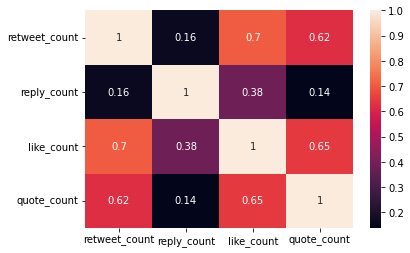

In [916]:
sns.heatmap(df_corr.corr(),annot=True)

#### f. ¿Has sacado alguna conclusión extra en tu análisis?

Cuantos más tweets se retuiteen, más personas los citarán y les gustarán.

###     ML

In [950]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC


In [969]:

with open('model/sentiment_model', 'rb') as archivo_entrada:
    sentiment_model = pickle.load(archivo_entrada)

In [919]:
sentiment_model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [948]:
df_tweets["text"]

0                                                         record sem vien prim qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1                                              desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link}
2                                                                                                                                         jorgegrev thebridgetech enhorabu crack
3     hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos sem vertical thebridgetech hic real mvps invit verl dar {link} {link}
4                                      qui ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳
                                                                                         ...                       

In [947]:
y_pred = sentiment_model.predict(df_tweets["text"])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

note : 0:predict bueno 1:predict malo

In [967]:
feature_to_coef = {
    word: coef for word, coef in zip(
        sentiment_model['vect'].get_feature_names(), sentiment_model['cls'].coef_[0]
    )
}

In [968]:
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print(best_positive)
    
print('################################')
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print(best_negative)
    

('cuent', 1.427233666085361)
('deficit', 1.4022058325629765)
('blanc', 1.368604445686843)
('muert', 1.3502570413482133)
('conden', 1.3429067328197288)
################################
('encant', -1.8605111981502893)
('enhorabuen', -1.8449366081495842)
('graci', -1.805329609096349)
('buen', -1.6751185631684895)
('feliz', -1.4730851687952473)
